<a href="https://colab.research.google.com/github/nmaguette/machine_learning_workshops/blob/master/Maguette_D1_1_Linear_Regression%2Cpart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align=center><font size=5>Linear Regression</font></h1>

## Table of contents


- [Linear regression](#LR)
    - [Data example](#LR_data)
    - [Linear regression with analytical solution](#LR_analytical)
    - [Linear regression with gradient descent](#LR_gradient_desc)
    - [Linear regression with scikit-learn](#LR_scikitlearn)
- [Polynomial regression](#poly_reg)
    - [Data example](#poly_data)
    - [Regression with polynomial features transformation](#reg_poly)
    - [Underfitting vs Overfitting](#under_over_fitting)
- [Summary](#summary)

## Linear regression <a id='LR'></a>

### Data example <a id="data"></a>

(100, 1)
(100, 1)


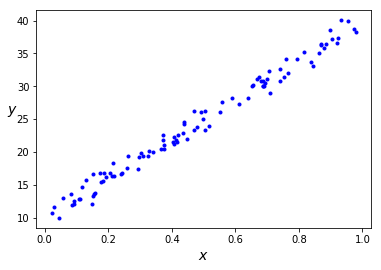

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 100 # Number of data samples

x = np.random.rand(N, 1)
print(x.shape)
y = 10 + 30 * x + np.random.randn(N, 1)
print(y.shape)

plt.plot(x, y, "b.")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.show()

### Linear regression with analytical solution <a id="LR_analytical"></a>

In this part, we practice how to solve the linear regression problem using analytical solution that we learned in the lesson. Please follow the following steps:

&#x270d; Compute the model parameters based on what you learned in the lesson. Note that, in order to compute inverse of a matrix, you can use the inv() function from Numpy's linear algebra module (i.e., np.linalg).

In [0]:
def get_best_param(x, y):
    X = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)
    X_transpose = X.T
    best_params = np.dot(np.dot(np.linalg.inv(np.dot(X_transpose,X)),X_transpose),y)
    return best_params  

theta_best = get_best_param(x, y)
print('Estimated parameters:\n', theta_best, '\nShape:', theta_best.shape)

Estimated parameters:
 [[29.69998365]
 [10.12356648]] 
Shape: (2, 1)


&#x270d; Plot the data and the fitted line

No handles with labels found to put in legend.


X shape: (100, 2)
theta.T shape: (100, 2)
y shape: (100, 1)


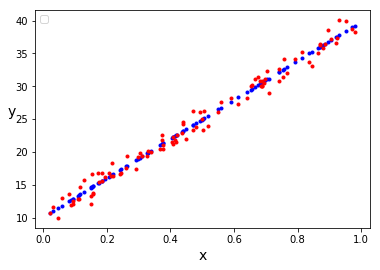

In [0]:
X = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)
print('X shape:', X.shape)
print('theta.T shape:', shaped_theta_best.shape)
y_pred = np.dot(X, theta_best)
print('y shape:', y_pred.shape)

plt.plot(x, y_pred, "b.")
plt.plot(x, y, "r.")
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', rotation = 0, fontsize = 14)
plt.legend(loc='upper left')
plt.show()

&#x270d; Use the best parameter theta to make predictions over new data.

In [0]:
X_new = np.concatenate((np.random.rand(x.shape[0], 1), np.ones((x.shape[0], 1))), axis=1)

y_pred = np.dot(X_new, theta_best)

&#x270d; Plot the new data according to the prediction

No handles with labels found to put in legend.


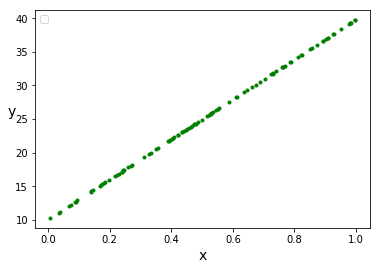

In [0]:
plt.plot(X_new[:,0], y_pred, 'g.')
#plt.plot(x, y, 'r.')
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', rotation = 0, fontsize = 14)
plt.legend(loc='upper left')
plt.show()

### Linear regression with gradient descent <a id="LR_gradient_desc"></a>

Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

&#x270d; Implement the gradient descent algorithm in order to estimate the parameter theta and display it.

In [0]:
eta = 0.01            # Set learning rate
n_iterations = 100    # Set number of iterations
theta = theta_best    # Initialize theta
N = 100               # Number of data samples

x = np.random.rand(N, 1)
X = np.concatenate((x, np.ones((N, 1))), axis=1)
y = 10 + 30 * x + np.random.randn(N, 1)

for iteration in range(n_iterations):
    y_pred = np.dot(X,theta)
    # Calculate the gradients 
    gradients = (1/N)*((X.T).dot(y_pred - y))  
    # update theta
    theta = theta - eta*gradients
    
print('Estimated theta\n', theta)

Estimated theta
 [[29.78588726]
 [10.15227396]]


&#x270d; Plot the cost function versus training iterations

No handles with labels found to put in legend.


Estimated theta:
 [[19.99768292]
 [15.00899263]]


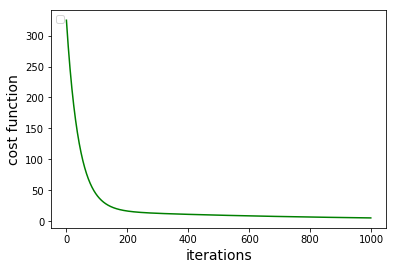

In [0]:
eta = 0.01            # Set learning rate
n_iterations = 1000    # Set number of iterations
theta = np.zeros((2,1))    # Initialize theta

x = np.random.rand(N, 1)
X = np.concatenate((x, np.ones((N, 1))), axis=1)
y = 10 + 30 * x + np.random.randn(N, 1)

#print(y)
cost_function_vec = np.zeros(n_iterations)

for iteration in range(n_iterations):
    
    y_pred = np.dot(X,theta) 

    # Define the cost function 
    cost_function = (1/(2*N))*np.sum(np.square(y_pred - y)) # or Mean Square Error MSE
    cost_function_vec[iteration] = cost_function

    # Calculate the gradients 
    gradients = (1/N)*((X.T).dot(y_pred - y))

    # update theta
    theta = theta - eta*gradients
    
#print('Cost function:\n', cost_function_vec)
#print('y_predicted:\n', y_pred)
print('Estimated theta:\n', theta)

# Plot cost function versus iterations
plt.plot(list(range(n_iterations))*np.ones(n_iterations), cost_function_vec, 'g')
plt.xlabel('iterations', fontsize = 14)
plt.ylabel('cost function', rotation = 90, fontsize = 14)
#plt.ylim(0,50)
plt.legend(loc='upper left')
plt.show()

&#x270d; Measure performance of the linear regression model using the following metrics:

1. Mean Absolute Error (MAE)
$$
\text{MAE} = \frac{1}{N} \sum_{n=1}^{N} {\left|{y_n - \hat{y}_n}\right|}
$$

In [0]:
mae = (1/N)*np.sum(y_pred - y)
print('Mean Absolute Error (MAE):\n', mae)

Mean Absolute Error (MAE):
 -0.00037112901175042625


2. Mean Square Error (MSE)
$$
\text{MSE} = \frac{1}{N} \sum_{n=1}^{N} {\left({y_n - \hat{y}_n}\right)^2}
$$

In [0]:
mse = (1/N)*np.sum(np.square(y_pred - y))
print('Mean Square Error (MSE):\n', mse)

Mean Square Error (MSE):
 0.800369184241591


3. Mean Absolute Percentage Error (MAPE)
$$
\text{MAPE} = \frac{100\%}{N} \sum_{n=1}^{N} {\left|\frac{y_n - \hat{y}_n}{y_n}\right|}
$$

In [0]:
mape = (100/N)*np.sum(abs((y_pred - y)/y_pred))
print('Mean Absolute Percentage Error (MAPE):\n', mape)

Mean Absolute Percentage Error (MAPE):
 3.246210493103616


4. Mean Percentage Error (MPE)
$$
\text{MAPE} = \frac{100\%}{N} \sum_{n=1}^{N} {\left(\frac{y_n - \hat{y}_n}{y_n}\right)}
$$

In [0]:
mpe = (100/N)*np.sum((y_pred - y)/y_pred)
print('Mean Percentage Error (MPE):\n', mpe)

Mean Percentage Error (MPE):
 4.211168634632088


5. R squared
$$
R^2 = 1 - \frac{\sum_{n=1}^{N} {\left({y_n - \hat{y}_n}\right)^2}}{\sum_{n=1}^{N} {\left({y_n - \bar{y}}\right)^2}}
$$ where $\bar{y} = \frac{1}{N} \sum_{n=1}^{N} {y_n}$.

In [0]:
def rsquared(y_pred, y):
  a = np.sum(np.square(y_pred - y))
  y_bar = (1/N)*np.sum(y_pred)
  b = np.sum(np.square(y_pred - y_bar))
  return (1 - a/b)
  
print('R squared:\n', rsquared(y_pred, y))

R squared:
 0.6774383201504859


### Linear regression with scikit-learn<a id="LR_scikitlearn"></a>

In this part, you can use linear regression implemented in linear model of sklearn package.

&#x270d; Calculate the regression parameters including the linear regression intercept and the linear regression coefficient, and make predictions over the data.

In [0]:
from sklearn.linear_model import LinearRegression

x = np.random.rand(N, 1)
#X = np.concatenate((x, np.ones((N, 1))), axis=1)
y = 10 + 30 * x + np.random.randn(N, 1)

lin_reg = LinearRegression()
#print(x[:int(0.2*N)])

# Fit the model
lin_reg.fit(x[:int(0.7*N)], y[:int(0.7*N)])

# Print the estimated parameters
print('Intercept: \n', lin_reg.intercept_)
print('Coefficient(s): \n', lin_reg.coef_)

# Predict x using the linear model
y_pred = lin_reg.predict(x[int(0.7*N):])

Intercept: 
 [9.86647681]
Coefficient(s): 
 [[30.69306613]]


&#x270d; Measure r2 score

In [0]:
r2 = rsquared(y_pred,y[int(0.7*N):])
print('r2 score: \n', r2)

r2 score: 
 0.9971075744949592


## Polynomial Regression <a id="poly_reg"></a>

You can actually use a linear model to fit a nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

### Data example <a id="poly_data"></a>

Let's start with generating a sample data.

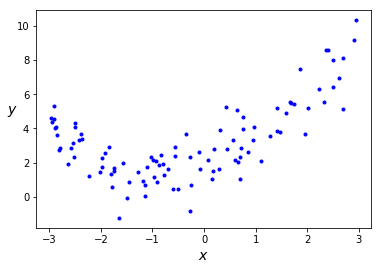

In [0]:
N = 100
X = 6 * np.random.rand(N, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(N, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.show()

### Regression with polynomial features transformation <a id="reg_poly"></a>

We can use Scikit-Learn’s PolynomialFeatures class to transform our training data, adding the square (2nd-degree polynomial) of each feature in the training set as new features (see [here]( https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) for further information).

In [0]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree= 2, include_bias=False)
X_poly = poly.fit_transform(X)

print('X_poly shape:', X_poly.shape)

X_poly shape: (100, 2)


$X_{poly}$ now contains the original feature of $X$ plus the square of this feature. 

&#x270d; Fit a linear regression model to this extended training data and display the intercept of linear regression and the coefficient.

In [0]:
lin_reg = LinearRegression()

# Fit the model
lin_reg.fit(X_poly[:int(0.7*N)], y[:int(0.7*N)])

# Print the estimated parameters
print('Intercept: \n', lin_reg.intercept_)
print('Coefficient(s): \n', lin_reg.coef_)

Intercept: 
 [1.58447413]
Coefficient(s): 
 [[0.92704992 0.58952522]]


9) Plot the prediction along with data

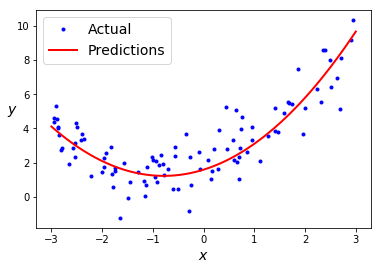

In [0]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.fit_transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.", label = 'Actual')
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

Note that, if you perform high-degree Polynomial Regression, you will likely fit the training data much better than
with a plain Linear Regression. 

### Underfitting vs. Overfitting <a id="under_over_fitting"></a>

&#x270d; Apply a 200-degree polynomial model over the data, and compare the result with a pure linear model and a quadratic model (2nd-degree polynomial).

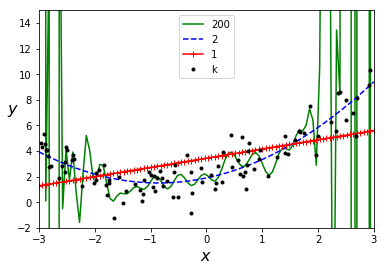

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline


for degree, style in ((200, "g-"), (2, "b--"), (1, "r-+")):
    # Instantiate the following models
    polynomial_features = PolynomialFeatures(degree= degree, include_bias=False)
    standard_scaler = StandardScaler()
    linear_regression = LinearRegression()
    
    # Create a pipeline
    polynomial_regression = Pipeline([("poly_features", polynomial_features),
                                      ("std_scaler", standard_scaler),
                                      ("lin_reg", linear_regression)])
    #make_pipeline(polynomial_features, standard_scaler, linear_regression)
    #Pipeline(steps=[polynomial_features, standard_scaler, linear_regression])

    # Fit the model
    polynomial_regression.fit(X, y)

    # Make predictions for X_new
    y_new = polynomial_regression.predict(X_new)

    #print(X_new.shape, y_ne)
    plt.plot(X_new, y_new, style, label=str(degree))
    #print('X_new: \n', X_new, '\nY_new: \n', y_new)

plt.plot(X, y, "k.", label='k', linewidth=3)
plt.legend(loc="best")
plt.xlabel("$x$", fontsize=16)
#plt.xspac
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.axis([-3, 3, -2, 15])
plt.show()

Notice how the 200-degree polynomial model moves to get as close as possible to training instances. Polynomial Regression model is severely overfitting the training data, while the linear model is underfitting it. The model that will generalize best in this case is the quadratic model.

## Summary <a id='summary'></a>

- In this project, we learned how to implement a linear regression model using:
    - Analytical solution
    - Gradient descent approach
    - Scikit-learn
- We also learned about polynomial regression model and how to use it along with a linear regression model for a non-linear data.